In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [5]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [6]:
df['Classes']=df['Classes'].str.strip()

In [7]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [8]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)
df['Classes'].unique()

array([0, 1])

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## features and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [15]:
## feature selection based on corr,remove highly +tive co-related , consider highly -tive co-related as imp feature  
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

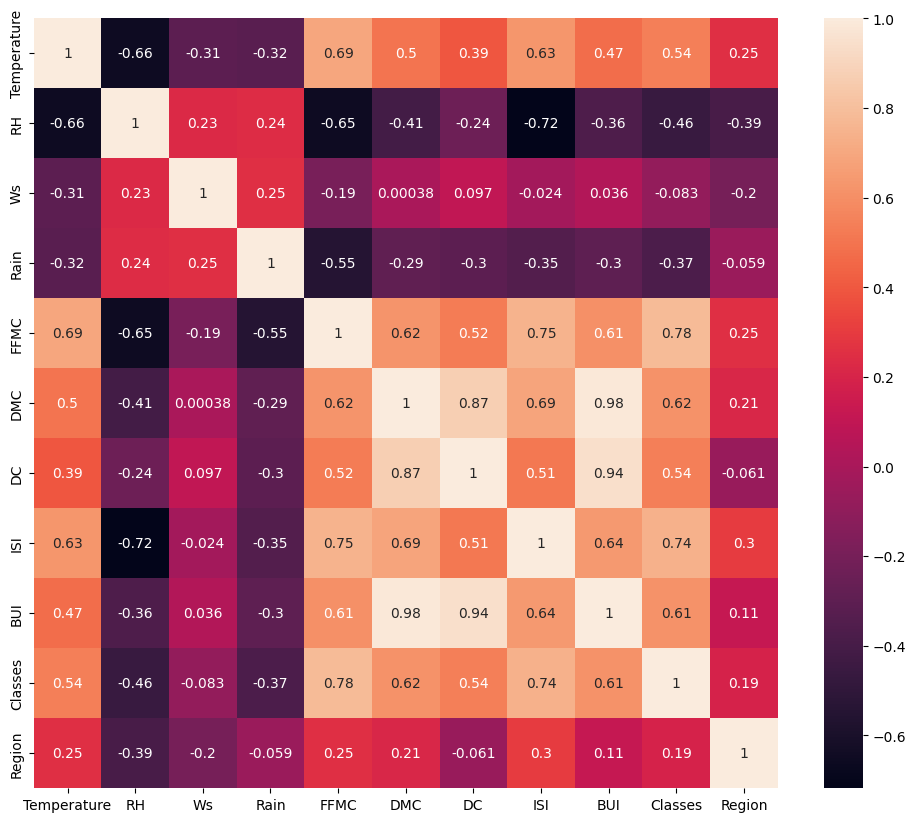

In [16]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
## code for check for multicollinearity
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
## theresold - give domain expertise
corr_features=correlation(X_train,0.90) ## features corr greater than 90% will return 

In [19]:
## drop features when corr is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 10), (61, 10))

 ## stndarization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:

X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)


 box plot for X_train before scaling vs after scaling

Text(0.5, 1.0, 'X_train after scaling')

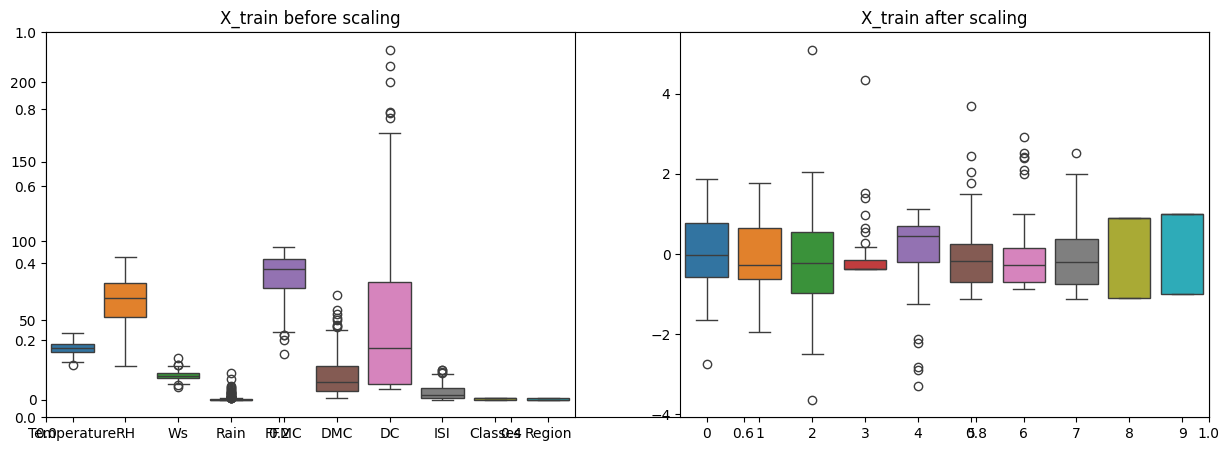

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scale)
plt.title("X_train after scaling")


## Linear regreesion model

0.7499258036691263
0.5170107980662408
0.7190346292538634
0.9830565611009445


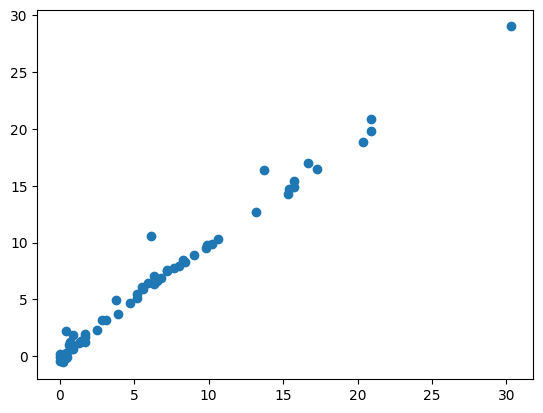

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scale,y_train)
linpred=linreg.predict(X_test_scale)
mse=mean_squared_error(y_test,linpred)
mae=mean_absolute_error(y_test,linpred)
rmse=np.sqrt(mae)
socre=r2_score(y_test,linpred)
print(mse)
print(mae)
print(rmse)
print(socre)
plt.scatter(y_test,linpred)


accuracy of model is 98%

## lasso regression

2.2177558134104585
1.1257992990774726
1.0610368980754028
0.9498931628519822


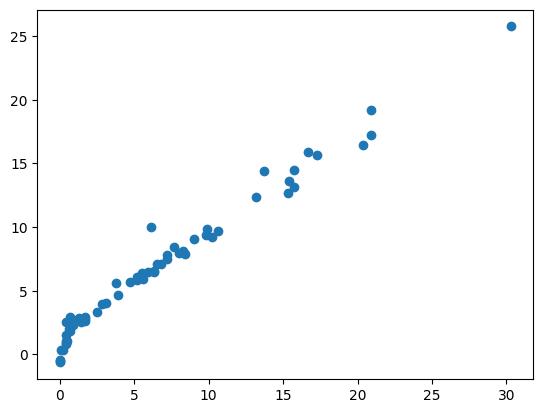

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lassoreg=Lasso()
lassoreg.fit(X_train_scale,y_train)
lassopred=lassoreg.predict(X_test_scale)
mse=mean_squared_error(y_test,lassopred)
mae=mean_absolute_error(y_test,lassopred)
rmse=np.sqrt(mae)
socre=r2_score(y_test,lassopred)
print(mse)
print(mae)
print(rmse)
print(socre)
plt.scatter(y_test,lassopred)

accuracy of model is 94%

## ridge regression

0.7787557734922156
0.5292519766274832
0.7274970629682866
0.9824051915524249


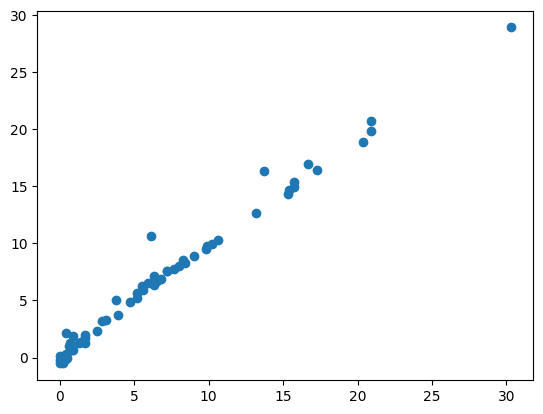

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridgereg=Ridge()
ridgereg.fit(X_train_scale,y_train)
ridgepred=ridgereg.predict(X_test_scale)
mse=mean_squared_error(y_test,ridgepred)
mae=mean_absolute_error(y_test,ridgepred)
rmse=np.sqrt(mae)
socre=r2_score(y_test,ridgepred)
print(mse)
print(mae)
print(rmse)
print(socre)
plt.scatter(y_test,ridgepred)

accuracy of model is 98.2%

## elastic net regression

4.922547261661467
1.7704255521425287
1.3305733922420546
0.8887824924177792


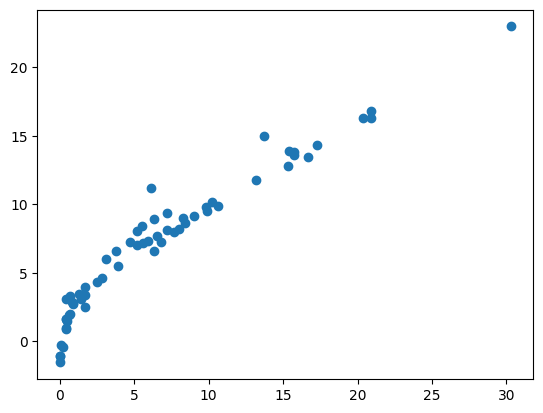

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elnreg=ElasticNet()
elnreg.fit(X_train_scale,y_train)
elnpred=elnreg.predict(X_test_scale)
mse=mean_squared_error(y_test,elnpred)
mae=mean_absolute_error(y_test,elnpred)
rmse=np.sqrt(mae)
socre=r2_score(y_test,elnpred)
print(mse)
print(mae)
print(rmse)
print(socre)
plt.scatter(y_test,elnpred)

accuracy of model is 88.8%

## cross validations lasso

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scale,y_train)

LassoCV(cv=5)

In [30]:
y_lassovc_pred=lassocv.predict(X_test_scale)

In [31]:
lassocv.alpha_ ## selected alpha

0.05725391318234408

In [32]:
lassocv.alphas_ ## tried alpha

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [33]:
lassocv.mse_path_ ## mse of each itrations

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

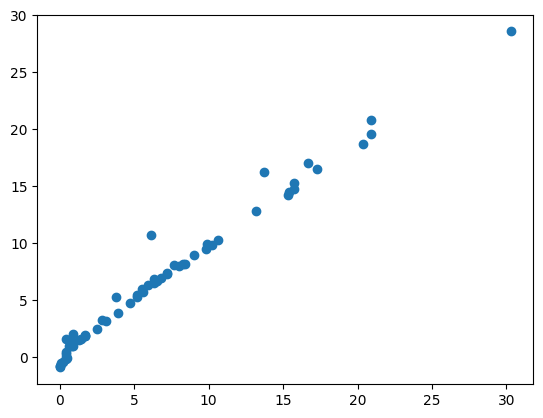

In [34]:
plt.scatter(y_test,y_lassovc_pred)

In [40]:
score1=r2_score(y_test,y_lassovc_pred)
print(score1)

0.9812242879221943


accuracy of model using lasso cross validation is 98.12%

## pickling the machine learning model,preporceesing model for standard scaler

In [35]:
ridgereg

Ridge()

In [36]:
scaler

StandardScaler()

In [37]:
import pickle

In [38]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridgereg.pkl','wb'))

In [39]:
model=pickle.load(open('ridgereg.pkl','rb'))